## チャプター1用のコード（除く環境作成）

In [9]:
import pandas as pd
from jupyter_dash import JupyterDash
import dash_html_components as html 
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

### 貿易収支の表とグラフ

In [3]:
boueki = pd.read_csv('https://www.customs.go.jp/toukei/shinbun/trade-st/timeseries_202005.csv', encoding='shift-jis')
boueki.head()

,《季節調整値》 （単位：百万円）,Unnamed: 1,Unnamed: 2
0,Seasonally adjusted data (a million yen),NaN,NaN
1,Years/Months,Exp-Total,Imp-Total
2,NaN,NaN,NaN
3,2010/06,5635901,5238395
4,2010/07,5688985,5187889


In [6]:
boueki = pd.read_csv(
    'https://www.customs.go.jp/toukei/shinbun/trade-st/timeseries_202003.csv',
    header=2,
    parse_dates=['Years/Months']
).dropna()
boueki.head()

,Years/Months,Exp-Total,Imp-Total
1,2010-04-01,5624812.0,5045774.0
2,2010-05-01,5644861.0,5167155.0
3,2010-06-01,5656904.0,5242205.0
4,2010-07-01,5684947.0,5209667.0
5,2010-08-01,5667545.0,5167381.0


In [18]:
# 貿易収支のバランスを加える（輸出 - 輸入）
boueki['balance'] = boueki['Exp-Total'] - boueki['Imp-Total']
boueki.head()

,Years/Months,Exp-Total,Imp-Total,balance
1,2010-04-01,5624812.0,5045774.0,579038.0
2,2010-05-01,5644861.0,5167155.0,477706.0
3,2010-06-01,5656904.0,5242205.0,414699.0
4,2010-07-01,5684947.0,5209667.0,475280.0
5,2010-08-01,5667545.0,5167381.0,500164.0


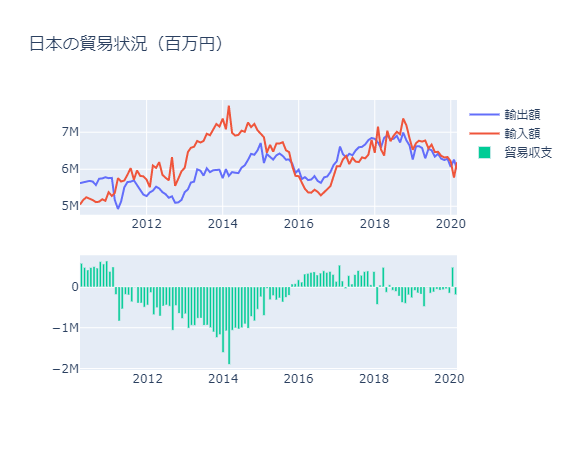

In [17]:
fig = make_subplots(2,1)

fig.add_trace(
    go.Scatter(x=boueki['Years/Months'], y=boueki['Exp-Total'], name='輸出額'),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=boueki['Years/Months'], y=boueki['Imp-Total'], name='輸入額'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=boueki['Years/Months'], y=boueki['balance'], name='貿易収支'),
    row=2, col=1
)
fig.update_layout(
    go.Layout(title='日本の貿易状況（百万円）')
)

fig.show()